In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_defend_orthogonal_teacher_factory, k_features_factory
from erm.problems.problems import ProblemType
from state_evolution.constants import SEProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.special import erfc

Define a datamodel

In [36]:
d = 1000

In [ ]:

defend_orthogonal_teacher = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1e3, int(0.01*d)), (1, int(0.99*d))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "seed":1
}

defend_orthogonal_teacher_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_defend_orthogonal_teacher_factory,
    factory_kwargs=defend_orthogonal_teacher,
    name="defend_orthogonal_teacher"
)



tradeoff_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1e3, int(0.01*d)), (1, int(0.99*d))]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1e3, int(0.01*d)), (1, int(0.99*d))]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1e3, int(0.01*d)), (1, int(0.99*d))]),
}

tradeoff_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=tradeoff_kwargs,
    name="tradeoff"
)


Define an experiment

In [ ]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=0,
    alphas=[1e2],
    epsilons=np.linspace(0.01,0.1,10),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models= [defend_orthogonal_teacher_datamodel, tradeoff_datamodel],
    test_against_epsilons=np.array([0.06]),
    erm_problem_type=ProblemType.Logistic,
    se_problem_type=SEProblemType.Logistic,
    gamma_fair_error=0.01,
    name="optimal_defense"
)
experiment_json = experiment.to_json()

In [39]:
with open("optimal_defense.json", "w") as f:
    f.write(experiment_json)

In [40]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment optimal_defense
INFO:root:Starting Experiment optimal_defense
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 1
INFO:root:This process has rank 4
INFO:root:This process has rank 3
  0%|          | 0/20 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Starting task 2
INFO:root:Starting task 4
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Initializing data model
INFO:root:Initializing data model
INFO:root:Initializing data model


2025-02-25 22:09:55,139 - Rank 0 - INFO - The MPI comm size is 5
2025-02-25 22:09:55,139 - Rank 0 - INFO - This process has rank 0
2025-02-25 22:09:55,139 - Rank 0 - INFO - Starting Master for experiment optimal_defense
2025-02-25 22:09:55,139 - Rank 0 - INFO - Starting Experiment optimal_defense
2025-02-25 22:09:55,156 - Rank 0 - INFO - Starting all processes
2025-02-25 22:09:55,156 - Rank 0 - INFO - Sending task 0 to 1
2025-02-25 22:09:55,157 - Rank 0 - INFO - Sending task 1 to 2
2025-02-25 22:09:55,157 - Rank 0 - INFO - Sending task 2 to 3
2025-02-25 22:09:55,157 - Rank 0 - INFO - Sending task 3 to 4
2025-02-25 22:09:55,157 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-02-25 22:09:55,157 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.      

2025-02-25 22:10:08,140 - Rank 0 - INFO - Received task 4 from 4
2025-02-25 22:10:08,141 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.020000000000000004, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163486950>)
2025-02-25 22:10:08,142 - Rank 0 - INFO - Received the 1th task


INFO:root:iter_nb: 1000, err: 0.006746314153133426
INFO:root:error: 0.006746314153133426
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:iter_nb: 1500, err: 4.2714691517176107e-05
INFO:root:error: 4.2714691517176107e-05
INFO:root:Finished State Evolution Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.01, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gam

2025-02-25 22:10:20,705 - Rank 0 - INFO - Received task 2 from 2
2025-02-25 22:10:20,705 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.01, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163487150>)
2025-02-25 22:10:20,707 - Rank 0 - INFO - Received the 2th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.09099181  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.09099181
   0.        ]
 [ 0.        

2025-02-25 22:10:31,694 - Rank 0 - INFO - Received task 6 from 2
2025-02-25 22:10:31,695 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.030000000000000006, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163487710>)
2025-02-25 22:10:31,695 - Rank 0 - INFO - Received the 3th task


INFO:root:Starting task 7
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113

2025-02-25 22:15:37,953 - Rank 0 - INFO - Received task 3 from 3
2025-02-25 22:15:37,953 - Rank 0 - INFO - Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.020000000000000004, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163487dd0>)
2025-02-25 22:15:37,954 - Rank 0 - INFO - Received the 4th task


INFO:root:iter_nb: 1500, err: 1.71472602232825e-05
INFO:root:error: 1.71472602232825e-05
INFO:root:Finished State Evolution Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.01, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 1 from 1
INFO:root:Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.01, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_

2025-02-25 22:15:44,399 - Rank 0 - INFO - Received task 1 from 1
2025-02-25 22:15:44,400 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.01, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634870d0>)
2025-02-25 22:15:44,402 - Rank 0 - INFO - Received the 5th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.09099181  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.09099181
   0.        ]
 [ 0.        

2025-02-25 22:15:48,372 - Rank 0 - INFO - Received task 8 from 3
2025-02-25 22:15:48,372 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.04000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163494390>)
2025-02-25 22:15:48,374 - Rank 0 - INFO - Received the 6th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished State Evolution Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.030000000000000006, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 5 from 4
INFO:root:Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.030000000000000006, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=100

2025-02-25 22:15:51,734 - Rank 0 - INFO - Received task 5 from 4
2025-02-25 22:15:51,734 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.030000000000000006, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163494fd0>)
2025-02-25 22:15:51,735 - Rank 0 - INFO - Received the 7th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.09099181  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.09099181
   0.        ]
 [ 0.        

2025-02-25 22:15:58,542 - Rank 0 - INFO - Received task 10 from 3
2025-02-25 22:15:58,542 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.05000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163494d10>)
2025-02-25 22:15:58,543 - Rank 0 - INFO - Received the 8th task


INFO:root:Starting task 12
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ..

2025-02-25 22:16:08,524 - Rank 0 - INFO - Received task 12 from 3
2025-02-25 22:16:08,524 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.06000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163495750>)
2025-02-25 22:16:08,527 - Rank 0 - INFO - Received the 9th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113818
  -0.02152955]
 [-0.05148273 -0.24545155 -0.0453108  ...

2025-02-25 22:16:26,527 - Rank 0 - INFO - Received task 7 from 2
2025-02-25 22:16:26,527 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.04000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634943d0>)
2025-02-25 22:16:26,529 - Rank 0 - INFO - Received the 10th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.09099181  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.09099181
   0.        ]
 [ 0.        

2025-02-25 22:16:38,195 - Rank 0 - INFO - Received task 14 from 2
2025-02-25 22:16:38,195 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.07, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163485d90>)
2025-02-25 22:16:38,196 - Rank 0 - INFO - Received the 11th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113818
  -0.02152955]
 [-0.05148273 -0.24545155 -0.0453108  ...

2025-02-25 22:21:15,821 - Rank 0 - INFO - Received task 9 from 1
2025-02-25 22:21:15,822 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.05000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634958d0>)
2025-02-25 22:21:15,825 - Rank 0 - INFO - Received the 12th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.09099181  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.09099181
   0.        ]
 [ 0.        

2025-02-25 22:21:27,615 - Rank 0 - INFO - Received task 16 from 1
2025-02-25 22:21:27,615 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.08, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x14fbe6810>)
2025-02-25 22:21:27,620 - Rank 0 - INFO - Received the 13th task


INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Received the 13th task
INFO:root:Starting task 17
INFO:root:Initializing data model
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([-13.65279979, -11.85003003, -11.28141124, ...,  11.92476053,
        12.91622269,  14.43138403]), array([2, 2, 2, ..., 2, 1, 1]))
INFO:root:Σ_ν value counts: (array([-13.65279979, -11.85003003, -11.28141124, ...,  11.92476053,
        12.91622269,  14.43138403]), array([2, 2, 2, ..., 2, 1, 1]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [9.99999004e+02 3.93298252e-06 3.88622181e-06 3.84211033e-06
 3.83638071e-06 3.79302012e-06 3.78231447e-06 3.74439964e-06
 3.73499805e-06 3.70514302e-06 3.69659643e-06 3.66009619e-06
 3.65661827e-06 3.60488656e-06 3.59157123e-06 3.57614898e-06
 3.54510349e-06 3.52908758e-06 3.51707782e-06 3.49756854e-06
 3.46872681e-06 3.45336857e-06 3.43397368e-06 3.43626193e-06
 3.42952656e-06 3.4043

2025-02-25 22:21:31,286 - Rank 0 - INFO - Received task 11 from 4
2025-02-25 22:21:31,290 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.06000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163495c50>)
2025-02-25 22:21:31,291 - Rank 0 - INFO - Received the 14th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.      

2025-02-25 22:21:42,621 - Rank 0 - INFO - Received task 18 from 4
2025-02-25 22:21:42,621 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.09000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163496fd0>)
2025-02-25 22:21:42,622 - Rank 0 - INFO - Received the 15th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113818
  -0.02152955]
 [-0.05148273 -0.24545155 -0.0453108  ...  0.03113818  0.16190976
  -0.11194673]
 [ 0.03559603  0.16970969  0.0313287  ... -0.02152955 -0.11194673
   0.07740307]]
INFO:root:Σ_ν: [[ 0.01

2025-02-25 22:21:48,898 - Rank 0 - INFO - Received task 13 from 3
2025-02-25 22:21:48,898 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.07, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634865d0>)
2025-02-25 22:21:48,904 - Rank 0 - INFO - Received the 16th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[90.99181074  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         90.99181074  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         90.99181074 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.      

2025-02-25 22:21:59,458 - Rank 0 - INFO - Received task 20 from 3
2025-02-25 22:21:59,458 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]])}, name='tradeoff', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x163487850>)
2025-02-25 22:21:59,458 - Rank 0 - INFO - Received the 17th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113818
  -0.02152955]
 [-0.05148273 -0.24545155 -0.0453108  ...  0.03113818  0.16190976
  -0.11194673]
 [ 0.03559603  0.16970969  0.0313287  ... -0.02152955 -0.11194673
   0.07740307]]
INFO:root:Σ_ν: [[ 0.01

2025-02-25 22:22:14,483 - Rank 0 - INFO - Received task 15 from 2
2025-02-25 22:22:14,483 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.08, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634a8910>)
2025-02-25 22:22:14,483 - Rank 0 - INFO - Received the 18th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113818
  -0.02152955]
 [-0.05148273 -0.24545155 -0.0453108  ...  0.03113818  0.16190976
  -0.11194673]
 [ 0.03559603  0.16970969  0.0313287  ... -0.02152955 -0.11194673
   0.07740307]]
INFO:root:Σ_ν: [[ 0.01

2025-02-25 22:24:45,415 - Rank 0 - INFO - Received task 17 from 1
2025-02-25 22:24:45,415 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.09000000000000001, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634a8210>)
2025-02-25 22:24:45,415 - Rank 0 - INFO - Received the 19th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 999.9999999999999
INFO:root:Norm Σ_ν: 999.9999999999999
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[ 0.01637121  0.07804726  0.01440769 ... -0.00990121 -0.05148273
   0.03559603]
 [ 0.07804726  0.37210246  0.06869059 ... -0.0472051  -0.24545155
   0.16970969]
 [ 0.01440769  0.06869059  0.0126814  ... -0.00871415 -0.0453108
   0.0313287 ]
 ...
 [-0.00990121 -0.0472051  -0.00871415 ...  0.00598941  0.03113818
  -0.02152955]
 [-0.05148273 -0.24545155 -0.0453108  ...  0.03113818  0.16190976
  -0.11194673]
 [ 0.03559603  0.16970969  0.0313287  ... -0.02152955 -0.11194673
   0.07740307]]
INFO:root:Σ_ν: [[ 0.01

2025-02-25 22:24:54,645 - Rank 0 - INFO - Received task 19 from 4
2025-02-25 22:24:54,645 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.06], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_defend_orthogonal_teacher_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1000.0, 10], [1, 990]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'seed': 1}, name='defend_orthogonal_teacher', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x1634a8b50>)
2025-02-25 22:24:54,645 - Rank 0 - INFO - All tasks sent and received
2025-02-25 22:24:54,652 - Rank 0 - INFO - Marking experiment optimal_defense as finished
2025-02-25 22:24:54,652 - Rank 0 - INFO - Experiment took 899 seconds
2025

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "optimal_defense", "state_evolution_repetitions": 1, "erm_repetitions": 0, "alphas": [100.0], "epsilons": [0.01, 0.020000000000000004, 0.030000000000000006, 0.04000000000000001, 0.05000000000000001, 0.06000000000000001, 0.07, 0.08, 0.09000000000000001, 0.1], "test_against_epsilons": [0.06], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "Sweep", "data_models": [{"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_defend_orthogonal_teacher_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b8_diagonal": {"diagonal": [[1000.0, 10], [1, 990]]}, "\\u03c9_diagonal": {"diagonal": [[1, 1000]]}, "seed": 1}, "name": "defend_orthogonal_teacher", "description": "", "gamma": 1}, {"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 1000]]}

In [41]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [42]:
data_model_names = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_99480/405034587.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend(title=data_model_names[0])
/var/folders/4p/9b_m1n3130xfbjd06qfyyqgc0000gn/T/ipykernel_99480/405034587.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(title=data_model_names[1])


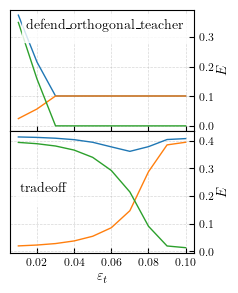

<Figure size 640x480 with 0 Axes>

In [43]:
IMG_DIRECTORY = "./Assets/optimal_defense"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
            bbox_inches="tight",
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

multiplier = 1.25
width = multiplier * 458.63788

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=1.0)
# tuple_size = (2*8.5/4,2.7/2)
tuple_size = (2.3,4.2)

fig, axs = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    sharey=False,
    figsize=(tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0.0},
)


# ICML adjustments
fig.subplots_adjust(left=0.1)
fig.subplots_adjust(bottom=0.22)
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=0.9)

axs = axs.flatten()


linestyles = ["solid", "dashed", "dashdot", "dotted"]

for dm_idx, data_model_name in enumerate(data_model_names):

    axs[dm_idx].grid(which="both", axis="both", alpha=0.5)

    df_filtered = df.filter(pl.col("data_model_name") == data_model_name)
    df_filtered = df_filtered.sort(by="epsilon")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error

    axs[dm_idx].plot(epsilons, adversarial_error,  color="C0")
    axs[dm_idx].plot(epsilons, generalization_error, color="C1")
    axs[dm_idx].plot(epsilons, boundary_error,  color="C2")


# axs[0].set_xscale("log")
# axs[0].set_yscale("log")
axs[0].set_ylabel(r"$E$", labelpad=2.0)
axs[0].set_xlabel(r"$\varepsilon_t$", labelpad=2.0)
# axs[0].grid(which="both", axis="both", alpha=0.5)
axs[0].tick_params(axis='both', which='major', direction='in')
axs[0].tick_params(axis='both', which='minor', direction='in')
axs[0].legend(title=data_model_names[0])


# axs[1].set_xscale("log")
# axs[1].set_yscale("log")
axs[1].set_ylabel(r"$E$", labelpad=2.0)
axs[1].set_xlabel(r"$\varepsilon_t$", labelpad=2.0)

axs[1].tick_params(axis='both', which='major', direction='in')
axs[1].tick_params(axis='both', which='minor', direction='in')
# axs[1].legend(title="Perturbed", loc="lower left")

# move ylabel and yticklabels to the right
axs[1].legend(title=data_model_names[1])
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

axs[0].yaxis.set_label_position("right")
axs[0].yaxis.tick_right()

error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))

# fig.legend(handles=error_legend, loc="upper center", ncol=3)

save = True
if save:
    save_plot(
        fig,
        "optimal_defense",
    )

plt.show()

plt.tight_layout()